## Problem Definition
- A campaign is running to reduce the water consumption in District 1. 
- The city has 11 districts (Campaign only runs at District 1)
- Let's see how effective this campaign is

## Data Overview
- The row is the daily water consumption (in liters). There are total 364 rows (364 days) continuously from 01-January.
- The columns are 11 district
- The campaign ran only in District 1 for the last 28 days (02-Dec to 30-Dec).

## Objective
- Evaluate whether the campaign have any significant impact on the water consumption in District 1? How much?

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>District_1</th>      <th>District_2</th>      <th>District_3</th>      <th>District_4</th>      <th>District_5</th>      <th>District_6</th>      <th>District_7</th>      <th>District_8</th>      <th>District_9</th>      <th>District_10</th>      <th>District_11</th>    </tr>    <tr>      <th>Day</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>01-01</th>      <td>30000.00</td>      <td>25188.97</td>      <td>28538.15</td>      <td>31483.59</td>      <td>30486.67</td>      <td>30892.30</td>      <td>30613.86</td>      <td>27324.14</td>      <td>25658.25</td>      <td>28994.79</td>      <td>27645.36</td>    </tr>    <tr>      <th>02-01</th>      <td>31859.96</td>      <td>32538.84</td>      <td>38301.84</td>      <td>28500.64</td>      <td>33390.60</td>      <td>30254.08</td>      <td>24096.06</td>      <td>30740.24</td>      <td>28504.75</td>      <td>32948.60</td>      <td>32895.67</td>    </tr>    <tr>      <th>03-01</th>      <td>31516.08</td>      <td>36534.43</td>      <td>24865.96</td>      <td>37001.22</td>      <td>30877.25</td>      <td>26671.67</td>      <td>23436.28</td>      <td>30992.98</td>      <td>27555.64</td>      <td>30934.14</td>      <td>31562.64</td>    </tr>    <tr>      <th>04-01</th>      <td>28790.81</td>      <td>19551.51</td>      <td>32441.73</td>      <td>35832.19</td>      <td>40637.68</td>      <td>35049.81</td>      <td>32555.86</td>      <td>28242.00</td>      <td>27142.70</td>      <td>31642.02</td>      <td>27085.91</td>    </tr>    <tr>      <th>05-01</th>      <td>27434.27</td>      <td>33289.90</td>      <td>30563.99</td>      <td>36903.76</td>      <td>36365.24</td>      <td>27596.44</td>      <td>19360.99</td>      <td>28404.61</td>      <td>33131.36</td>      <td>29676.91</td>      <td>23879.14</td>    </tr>  </tbody></table>

## Hypothesis (select $\alpha$ = 5%)
- $H_{0}$: Campaign didn't have any impact on District 1 (coefficient of treament in linear equation with consumption = 0)
- $H_{1}$: Campaign actually reduce the water consumption in District 1 (coefficient of treament in linear equation is significantly negative)
- One-tailed test valuation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error #as mse, mae, mape

from preproc import Preproc as preprocess
from preproc import plot_eda

import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv("data/Water_Consumption_by_District.csv")
display(df.head(5))

,District_1,District_2,District_3,District_4,District_5,District_6,District_7,District_8,District_9,District_10,District_11
0,30000.00,25188.97,28538.15,31483.59,30486.67,30892.30,30613.86,27324.14,25658.25,28994.79,27645.36
1,31859.96,32538.84,38301.84,28500.64,33390.60,30254.08,24096.06,30740.24,28504.75,32948.60,32895.67
2,31516.08,36534.43,24865.96,37001.22,30877.25,26671.67,23436.28,30992.98,27555.64,30934.14,31562.64
3,28790.81,19551.51,32441.73,35832.19,40637.68,35049.81,32555.86,28242.00,27142.70,31642.02,27085.91
4,27434.27,33289.90,30563.99,36903.76,36365.24,27596.44,19360.99,28404.61,33131.36,29676.91,23879.14


In [28]:
dff = df.head(5)

In [29]:
dff["Day"] = ["01-01", "02-01", "03-01", "04-01", "05-01"]
s = dff.set_index("Day", drop=True).to_html().replace("\n", "")
print(s)

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>District_1</th>      <th>District_2</th>      <th>District_3</th>      <th>District_4</th>      <th>District_5</th>      <th>District_6</th>      <th>District_7</th>      <th>District_8</th>      <th>District_9</th>      <th>District_10</th>      <th>District_11</th>    </tr>    <tr>      <th>Day</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>01-01</th>      <td>30000.00</td>      <td>25188.97</td>      <td>28538.15</td>      <td>31483.59</td>      <td>30486.67</td>      <td>30892.30</td>      <td>30613.86</td>      <td>27324.14</td>      <td>25658.25</td>      <td>28994.79</td>      <td>27645.36</td>    </tr>    <tr>      <th>02-01</th>      <td>31859.96</td>      <td>32538.84</td>      <td>38301.84</td>      <td>285

### DATA EXPLORATION

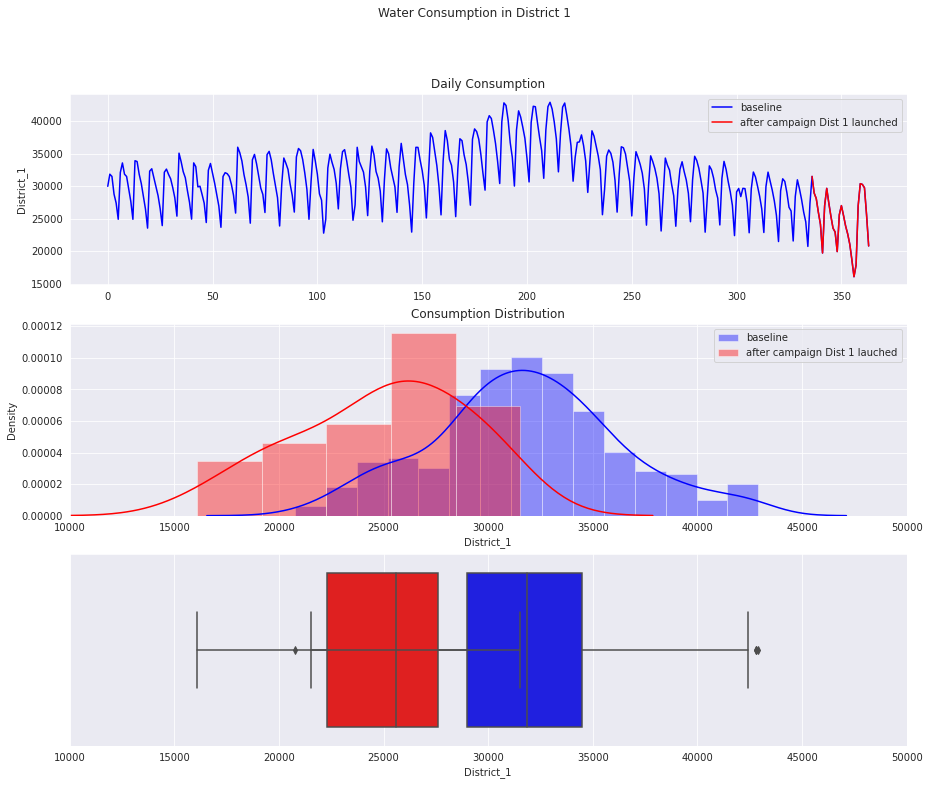

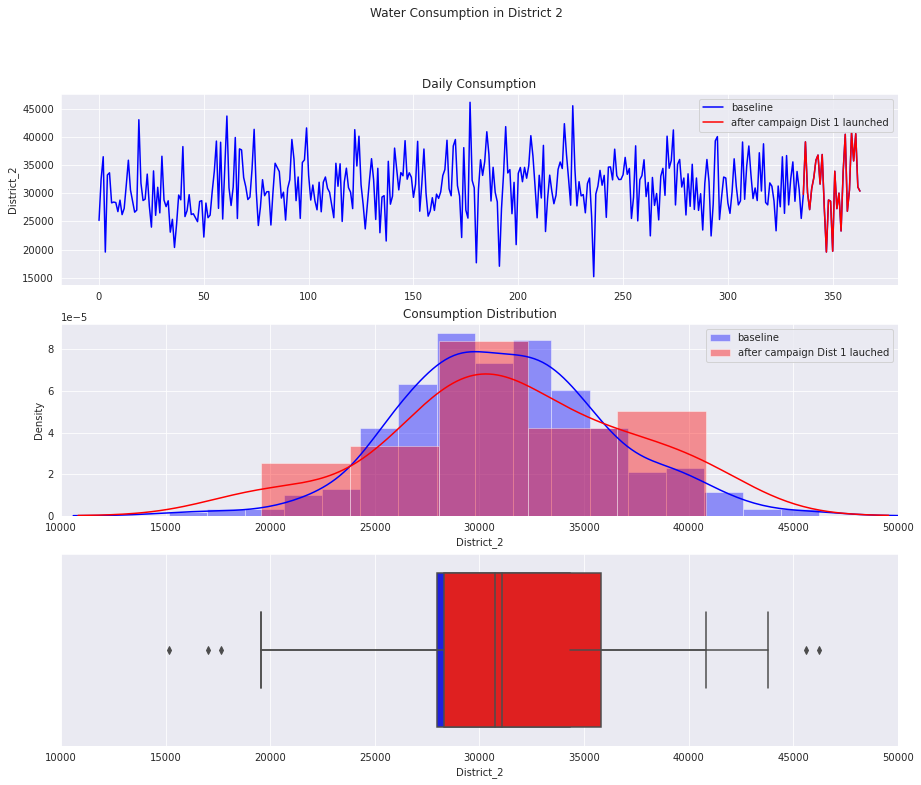

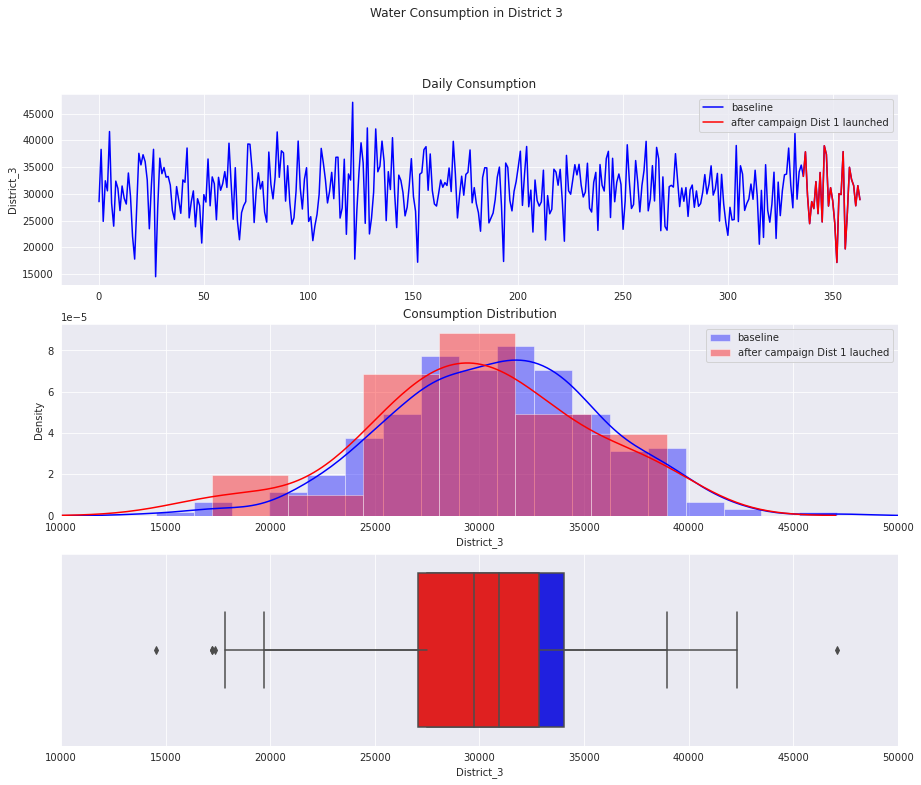

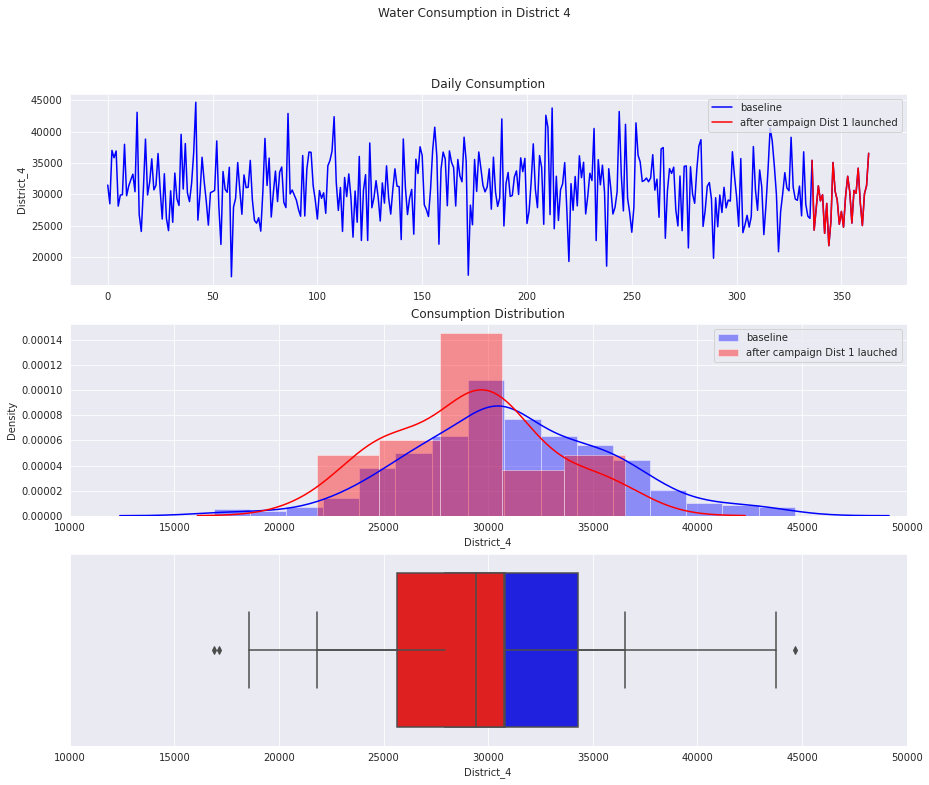

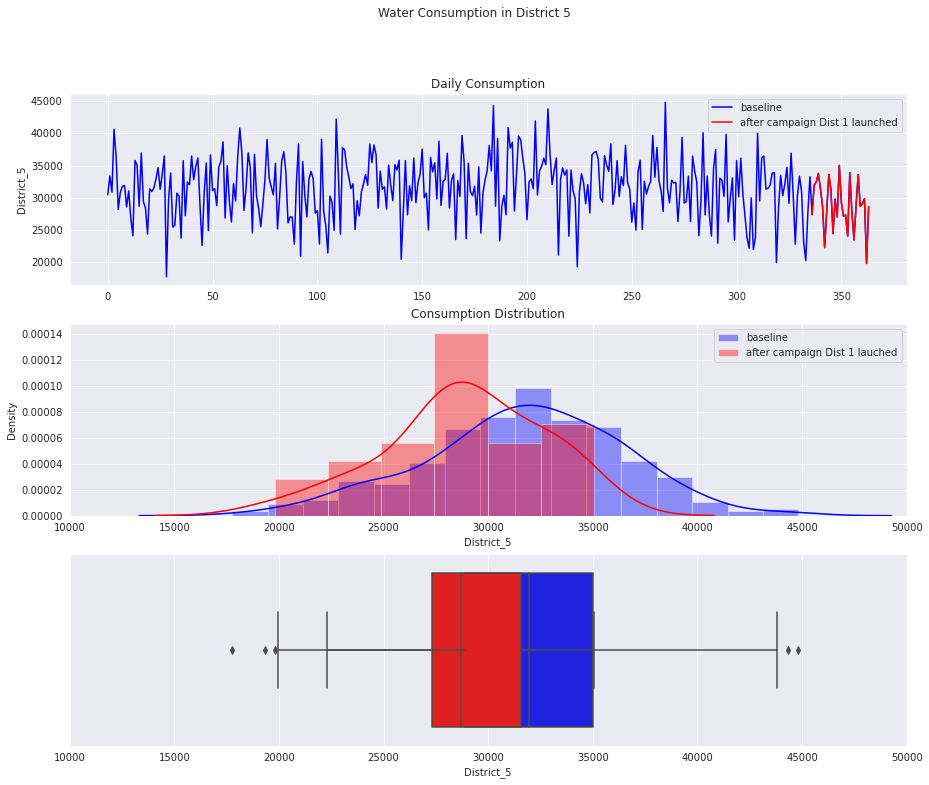

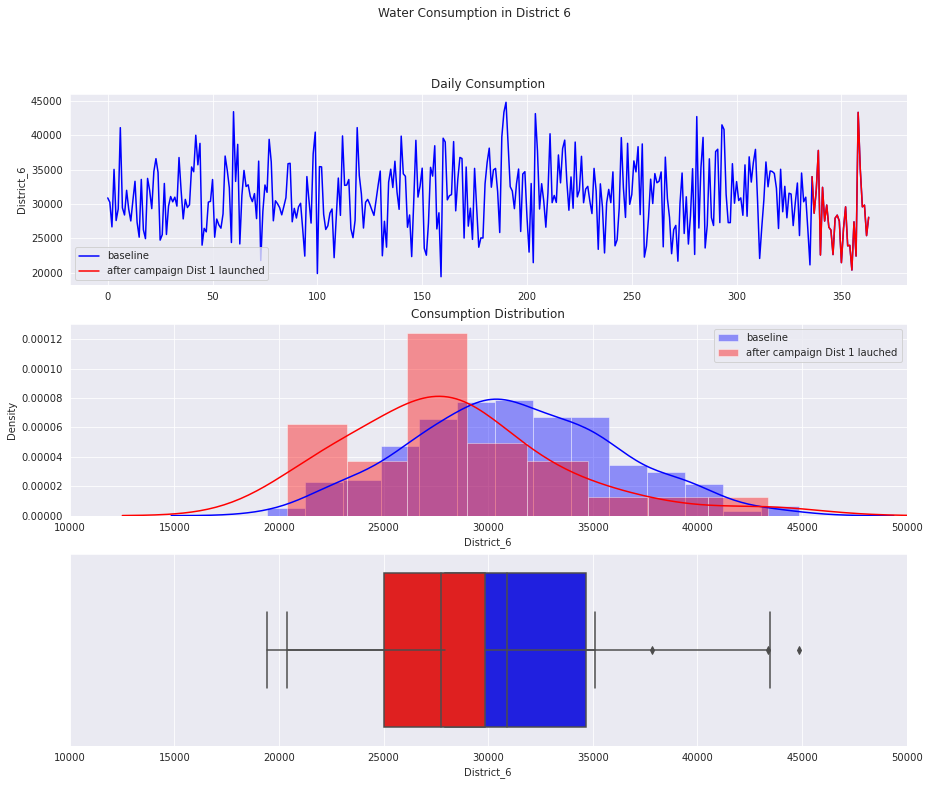

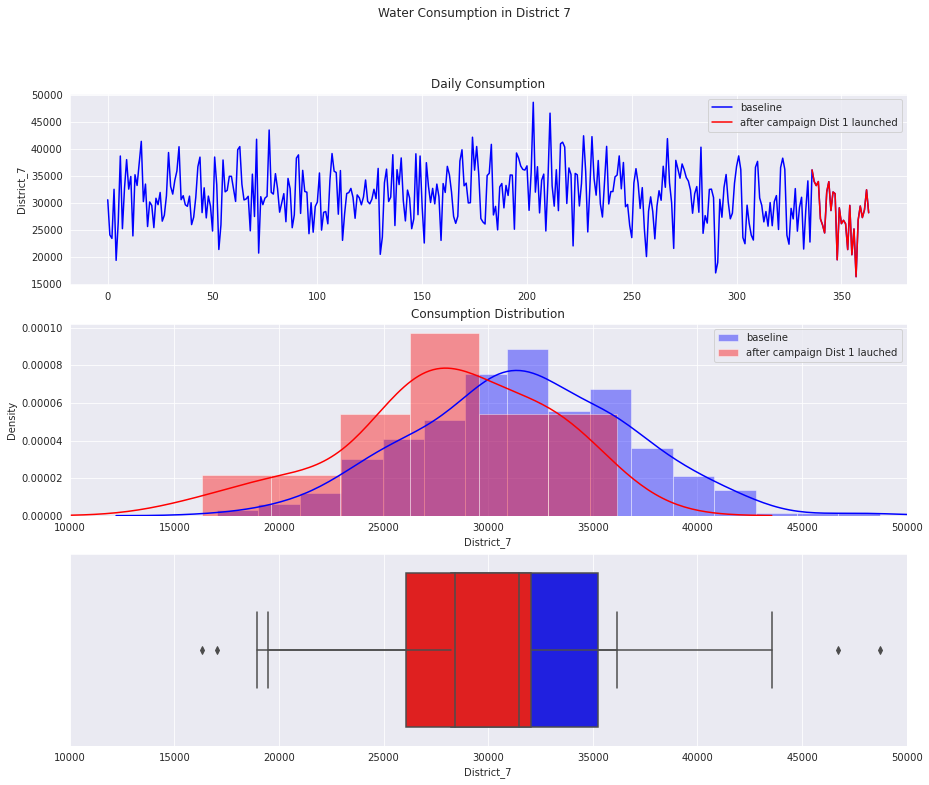

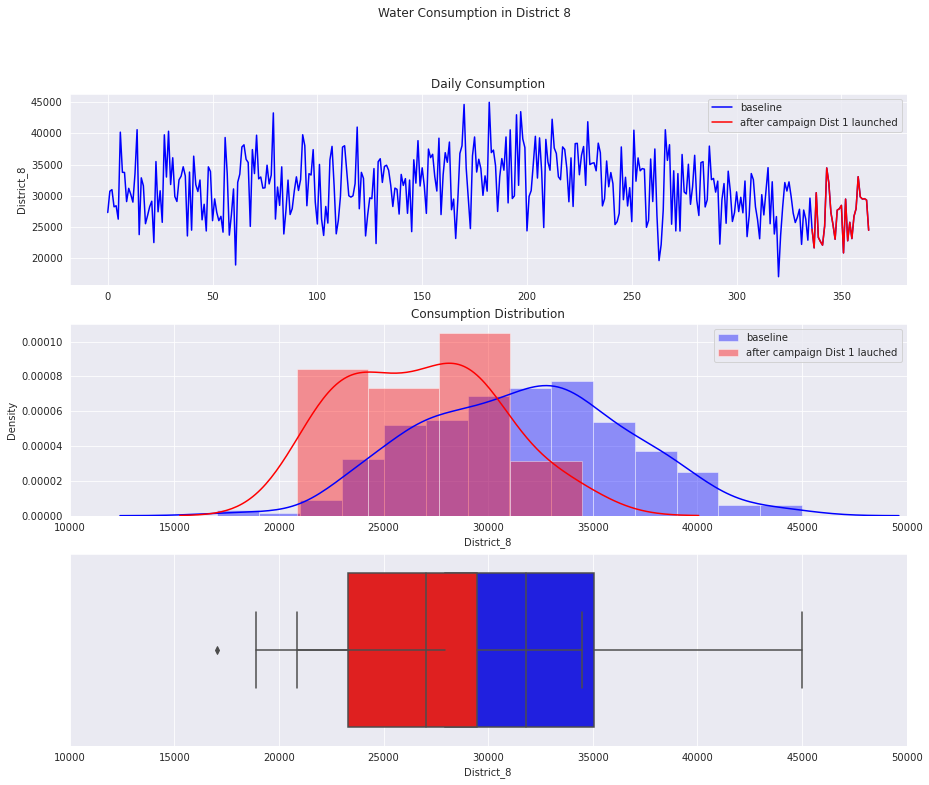

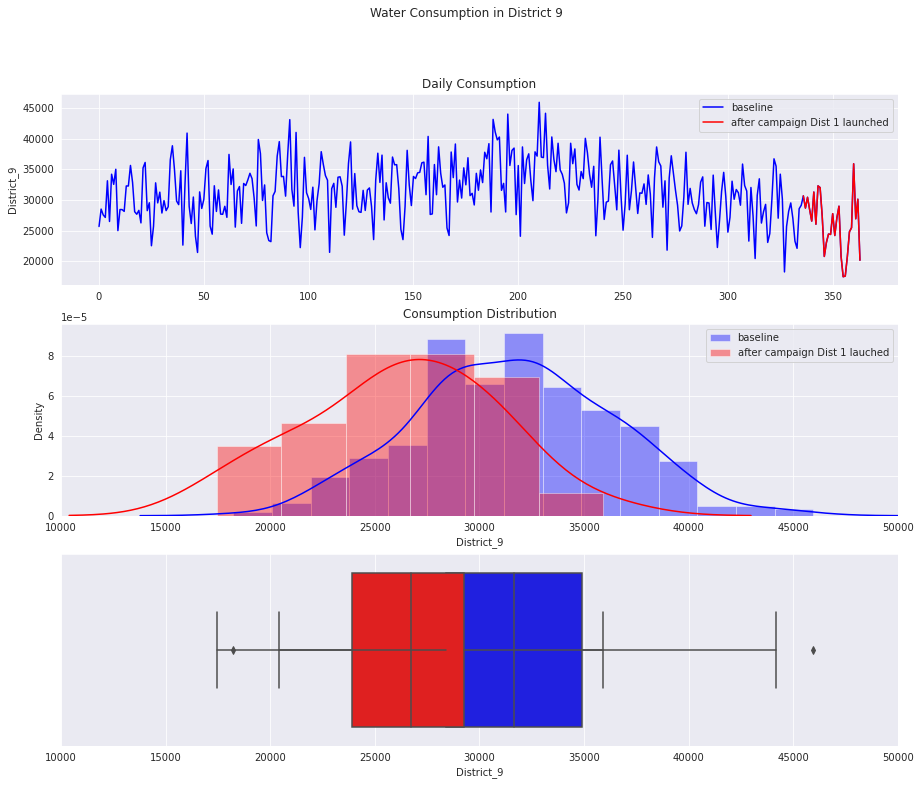

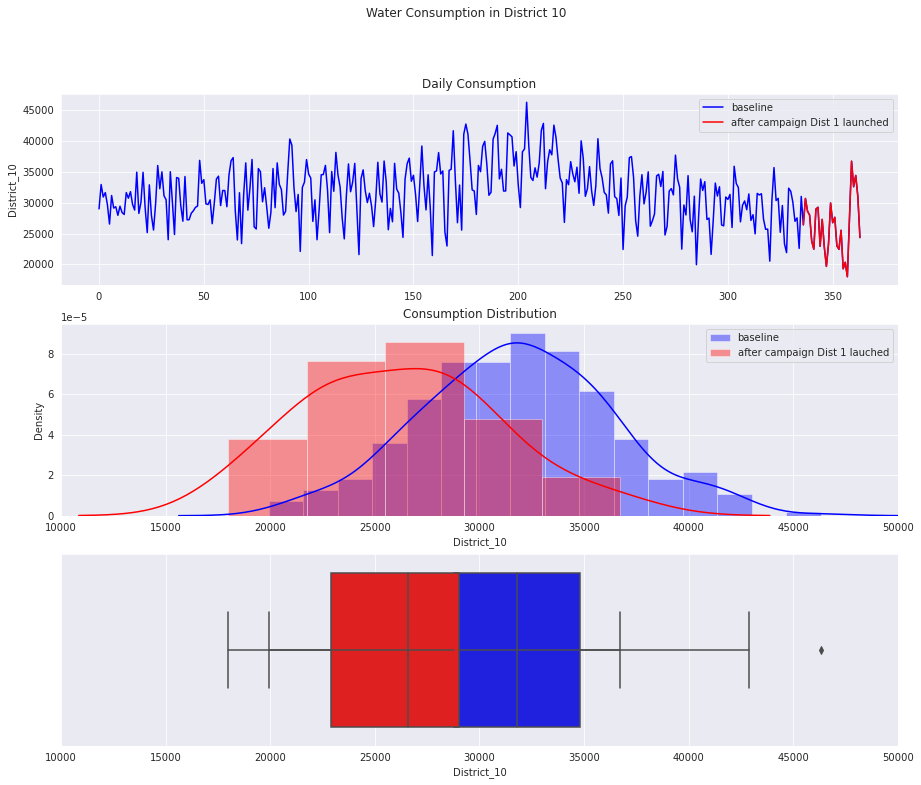

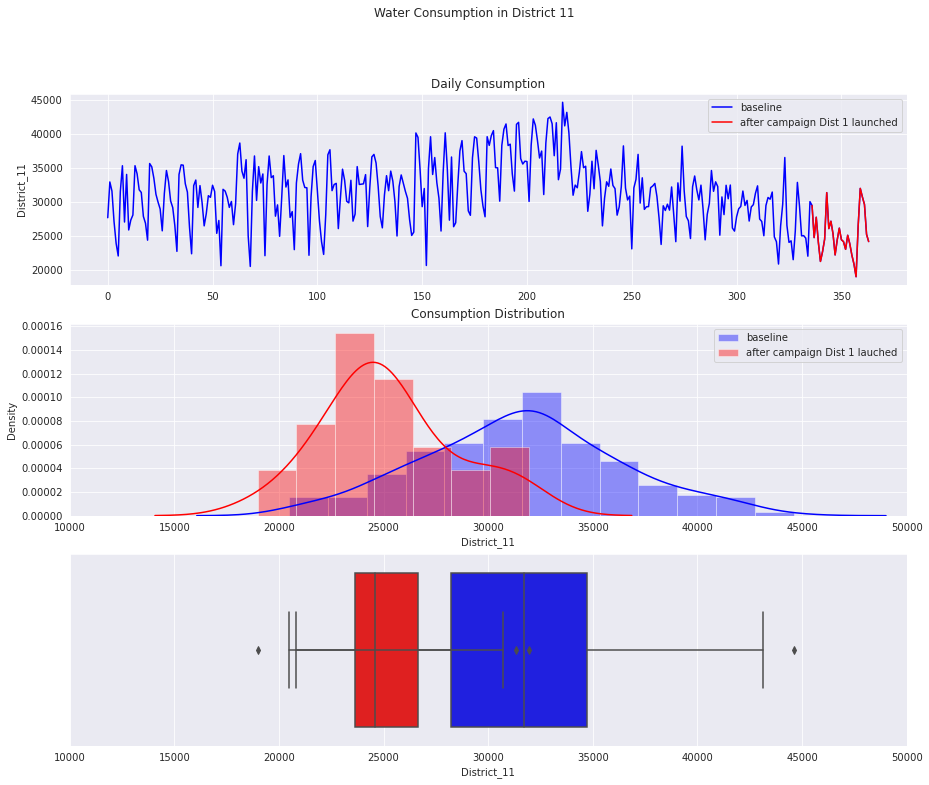

In [3]:
plot_eda(df)

#### Notes:
- There could be a consumption distribution shift after the campaign lauched in District 1 in district 1, 6-11
- However, we're still unsure if the change is due to campaign or it's just seasonal effect

### Convert time seasonal feature into cyclic features (Fourier Series) with sin and cos:
- Weekly cyclic features as the habit of using water can be repeated with the same weekday
- Monthly cyclic features as the habit of using water can vary depend upon season (i.e: more water used in summer than winter)
- At level 3
- Assume the day starts from 01/01

In [4]:
df = preprocess().fourier_seasonality(df)
# Add treatment variable, where campaign start in the last 28 days
df["Treament_District_1"] = 0
df["Treament_District_1"].iloc[-28:] = 1
display(df.head(10))

,District_1,District_2,District_3,District_4,District_5,District_6,District_7,District_8,District_9,District_10,...,cos_year_1n,sin_week_2n,cos_week_2n,sin_year_2n,cos_year_2n,sin_week_3n,cos_week_3n,sin_year_3n,cos_year_3n,Treament_District_1
0,30000.00,25188.97,28538.15,31483.59,30486.67,30892.30,30613.86,27324.14,25658.25,28994.79,...,0.866025,0.000000e+00,1.000000,0.5,0.866025,0.000000e+00,1.000000,0.5,0.866025,0
1,31859.96,32538.84,38301.84,28500.64,33390.60,30254.08,24096.06,30740.24,28504.75,32948.60,...,0.866025,9.749279e-01,-0.222521,0.5,0.866025,4.338837e-01,-0.900969,0.5,0.866025,0
2,31516.08,36534.43,24865.96,37001.22,30877.25,26671.67,23436.28,30992.98,27555.64,30934.14,...,0.866025,-4.338837e-01,-0.900969,0.5,0.866025,-7.818315e-01,0.623490,0.5,0.866025,0
3,28790.81,19551.51,32441.73,35832.19,40637.68,35049.81,32555.86,28242.00,27142.70,31642.02,...,0.866025,-7.818315e-01,0.623490,0.5,0.866025,9.749279e-01,-0.222521,0.5,0.866025,0
4,27434.27,33289.90,30563.99,36903.76,36365.24,27596.44,19360.99,28404.61,33131.36,29676.91,...,0.866025,7.818315e-01,0.623490,0.5,0.866025,-9.749279e-01,-0.222521,0.5,0.866025,0
5,24935.01,33670.79,41635.43,28138.06,28199.01,29287.14,26419.45,26264.66,26481.13,26536.76,...,0.866025,4.338837e-01,-0.900969,0.5,0.866025,7.818315e-01,0.623490,0.5,0.866025,0
6,32121.17,28319.68,28265.52,29880.09,30850.30,41134.93,38740.19,40205.10,34203.18,31165.74,...,0.866025,-9.749279e-01,-0.222521,0.5,0.866025,-4.338837e-01,-0.900969,0.5,0.866025,0
7,33589.01,28458.84,23972.48,29950.79,31789.97,29449.17,25247.20,33767.96,32547.80,29134.64,...,0.866025,-4.898587e-16,1.000000,0.5,0.866025,-7.347881e-16,1.000000,0.5,0.866025,0
8,31856.86,28370.61,32380.43,37969.64,31907.65,28407.34,32774.80,33749.25,35012.72,29341.51,...,0.866025,9.749279e-01,-0.222521,0.5,0.866025,4.338837e-01,-0.900969,0.5,0.866025,0
9,31508.09,26758.61,31004.23,29779.87,28599.15,32000.66,38068.05,29077.68,24983.69,27953.45,...,0.866025,-4.338837e-01,-0.900969,0.5,0.866025,-7.818315e-01,0.623490,0.5,0.866025,0


## LINEAR REGRESSION ANALYSIS FOR CONSUMPTION OF DISTRICT 1 at day t
$
\begin{align}
C_{k}(t) = \frac{a_{0}}{2} + \sum \limits _{i=1} ^{n} \bigg[a_{n}cos\frac{2n\pi t}{T} + b_{n}sin\frac{2n\pi t}{T}\bigg]
+ c_{0} Treatment(t)
+ \sum \limits _{j=1, j \neq k} ^{11} d_{j} C_{j}(t)
\end{align}
$ <br>
where (among 11 districts): <br>
- $C_{k}(t)$: Water consumption at time $t$ at district $k$ <br> 
- $C_{j}(t)$: Water consumption at time $t$ at district $j \neq k$ <br> 
- $d_{j}$: Coefficients of consumption impact from district $j$ to district $ k$ <br> 
- Fourier Series shows the seasonality relationship. We have both weekly and yearly seasonality <br>
- $ T = 7 $ for weekly seasonality, $ T = 12 $ for yearly seasonality <br>
- order of Fourier Series $n = 3$, is selected <br>
- $Treatment(t)$ is binary values to show whether the campaign is launched at $t$ <br>
    - Treatment = 0 before week 48 ($t \leq 335$)
    - Treatment = 1 after campaign start at week 48 ($t \geq 336$)

##### The objective is to see if $ c_{0} $ is significant negative than 0

### R-tyle OLS Regression analysis

In [5]:
func = """District_1 ~ 
            sin_week_1n + cos_week_1n 
            + sin_week_2n + cos_week_2n
            + sin_week_3n + cos_week_3n + 
            sin_year_1n + cos_year_1n 
            + sin_year_2n + cos_year_2n 
            + sin_year_3n + cos_year_3n + 
            District_2 + District_3 + District_4 
             + District_5 + District_6 + District_7 
             + District_8 + District_9 + District_10 + District_11 +
            Treament_District_1
        """
fit_results = smf.ols(func, data=df).fit()
print(fit_results.summary())

                            OLS Regression Results                            
Dep. Variable:             District_1   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          3.54e-179
Time:                        13:01:00   Log-Likelihood:                -3134.9
No. Observations:                 364   AIC:                             6310.
Df Residuals:                     344   BIC:                             6388.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2345.2424   1

- Regression result shows that p-value of treatment coefficient = 0.005 < 0.05 / 2 for district 1
- This means we can reject the null hypothesis. The coefficient of treament effect is negatively significant and different from 0
- the daily water consumption at District 1 is predicted to be lower by 880 litres (compared with the usual day), thanks to this campaign
- Also, p-value of variable `cos_week_3n`,  `sin_year_3n`, `sin_year_1n`, `sin_year_2n`, `sin_year_3n`, and `consumption of district 2 to 4`  > 0.05, so this means those variables are not statistically significantly different from 0. So we can remove this from function
- The consumption of district 5 - 11 signficantly impacts the consumption at district 1
- The water consumption model of District 1 is explicitly represented by:

$\begin{align}
C_{1}(t) = 2345.2424 
                           + 1023.8563 sin{\frac{2 \pi t}{7}} + 796.9244 cos{\frac{2 \pi t}{7}} 
                           - 235.4524 sin{\frac{4 \pi t}{7}} + 577.6707 cos{\frac{4 \pi t}{7}}
                           - 871.0032 sin{\frac{6 \pi t}{7}}
\end{align}$
$\begin{align}
                           - 394.9983 cos{\frac{2 \pi t}{12}} 
                           - 394.9983 cos{\frac{4 \pi t}{12}}
                           - 394.9983 cos{\frac{6 \pi t}{12}}
\end{align}$
$\begin{align}
                           + 0.0392 C_{5}(t) + 0.0662 C_{6}(t) + 0.057 C_{7}(t)
\end{align}$
$\begin{align}
                           +  0.0707 C_{8}(t) + C_{9}(t) + 0.1674 C_{10}(t)
                           +  0.3606 C_{11}(t)
                           - 880.0455 Treatment(t)
\end{align}$

Adjusted R squared =  0.919463566534413
RMSE               =  1933.1728706098218
MAE                =  1594.4797710850528
MAPE               =  0.051321756495113925




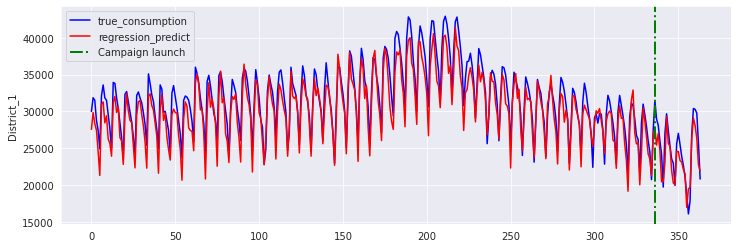

In [6]:
# Expression mathematical formula
df["District_1_pred"] = 2345.2424 + \
                        1023.8563 *df["sin_week_1n"] + 796.9244*df["cos_week_1n"] + \
                        -235.4524 *df["sin_week_2n"] + 577.6707*df["cos_week_2n"] + \
                        -283.3212 *df["sin_week_3n"] +\
                        -394.9983*df["cos_year_1n"] +\
                        -394.9983*df["cos_year_2n"]  + \
                        - 394.9983*df["cos_year_3n"] +\
                        -880.0455*df["Treament_District_1"] +\
                        + 0.0392 * df["District_5"] + 0.0662 * df["District_6"] + 0.057 * df["District_7"] +\
                        +  0.0707 * df["District_8"] + 0.1222 * df["District_9"] + 0.1674 * df["District_10"] +\
                        +  0.3606 * df["District_11"]

print("Adjusted R squared = ", fit_results.rsquared_adj)
print("RMSE               = ", mean_squared_error(df["District_1"].values, df["District_1_pred"].values)**0.5)
print("MAE                = ", mean_absolute_error(df["District_1"].values, df["District_1_pred"].values))
print("MAPE               = ", mean_absolute_percentage_error(df["District_1"].values, df["District_1_pred"].values))
print("\n")
fig = plt.subplots(figsize = (12,4))
sns.lineplot(x = range(df.shape[0]), y = "District_1", 
             data = df, color="blue", label=f"true_consumption")
sns.lineplot(x = range(df.shape[0]), y = "District_1_pred",
             data = df, color="red", label="regression_predict")
plt.axvline(336, color="green", label="Campaign launch", linewidth=2, linestyle="-.")
plt.legend()
plt.show()

### So we conclude the campaign at District 1 has the great impact to the consumption at District. But do the campaign in District 1 also impacts other Districts ???

### Now we replace the fitting function with each district from 2 to 11

In [20]:
for district in range(2, 12):
    print(f"\n\n*** Analyze district {district} ***")
    other_district_list = [f"District_{i}" for i in range(1, district)] + [f"District_{i}" for i in range(district+1, 12)]
    other_district = """ + """.join(other_district_list)
    print(f"vs. {other_district}")
    func = f"""District_{district} ~ sin_week_1n + cos_week_1n + sin_week_2n + cos_week_2n + sin_week_3n + cos_week_3n + sin_year_1n + cos_year_1n 
                + sin_year_2n + cos_year_2n + sin_year_3n + cos_year_3n + Treament_District_1 
                + """ + other_district
    print("Function Expression:")
    print(func)        
    fit_results = smf.ols(func, data=df).fit()
    print(fit_results.summary())



*** Analyze district 2 ***
vs. District_1 + District_3 + District_4 + District_5 + District_6 + District_7 + District_8 + District_9 + District_10 + District_11
Function Expression:
District_2 ~ sin_week_1n + cos_week_1n + sin_week_2n + cos_week_2n + sin_week_3n + cos_week_3n + sin_year_1n + cos_year_1n 
                + sin_year_2n + cos_year_2n + sin_year_3n + cos_year_3n + Treament_District_1 
                + District_1 + District_3 + District_4 + District_5 + District_6 + District_7 + District_8 + District_9 + District_10 + District_11
                            OLS Regression Results                            
Dep. Variable:             District_2   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.229
Date:                Sat, 23 Oct 2021   Prob (F-statistic):              0.231
Time:                        13:18:57   Log-Likelihood

#### We can have the `p-value` summary of each coefficients for each district regression analysis as follows:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: left;">      <th>Output</th>      <th>Coeff. Treament District 1</th>      <th>Coeff. District 1</th>      <th>Coeff. District 2</th>      <th>Coeff. District 3</th>      <th>Coeff. District 4</th>      <th>Coeff. District 5</th>      <th>Coeff. District 6</th>      <th>Coeff. District 7</th>      <th>Coeff. District 8</th>      <th>Coeff. District 9</th>      <th>Coeff. District 10</th>      <th>Coeff. District 11</th>    </tr>  </thead>  <tbody>    <tr>      <td>District 1</td>      <td>0.005</td>      <td></td>      <td>0.516</td>      <td>0.238</td>      <td>0.260</td>      <td>0.016</td>      <td>0.000</td>      <td>0.000</td>      <td>0.000</td>      <td>0.000</td>      <td>0.000</td>      <td>0.000</td>    </tr>    <tr>      <td>District 2</td>      <td>0.252</td>      <td>0.516</td>      <td></td>      <td>0.374</td>      <td>0.860</td>      <td>0.463</td>      <td>0.403</td>      <td>0.448</td>      <td>0.562</td>      <td>0.046</td>      <td>0.138</td>      <td>0.961</td>    </tr>    <tr>      <td>District 3</td>      <td>0.909</td>      <td>0.238</td>      <td>0.374</td>      <td></td>      <td>0.914</td>      <td>0.430</td>      <td>0.772</td>      <td>0.985</td>      <td>0.154</td>      <td>0.328</td>      <td>0.977</td>      <td>0.748</td>    </tr>    <tr>      <td>District 4</td>      <td>0.335</td>      <td>0.260</td>      <td>0.860</td>      <td>0.914</td>      <td></td>      <td>0.753</td>      <td>0.617</td>      <td>0.831</td>      <td>0.783</td>      <td>0.215</td>      <td>0.311</td>      <td>0.241</td>    </tr>    <tr>      <td>District 5</td>      <td>0.568</td>      <td>0.016</td>      <td>0.463</td>      <td>0.430</td>      <td>0.753</td>      <td></td>      <td>0.490</td>      <td>0.553</td>      <td>0.863</td>      <td>0.427</td>      <td>0.700</td>      <td>0.350</td>    </tr>    <tr>      <td>District 6</td>      <td>0.363</td>      <td>0.000</td>      <td>0.403</td>      <td>0.772</td>      <td>0.617</td>      <td>0.490</td>      <td></td>      <td>0.087</td>      <td>0.413</td>      <td>0.978</td>      <td>0.498</td>      <td>0.242</td>    </tr>    <tr>      <td>District 7</td>      <td>0.773</td>      <td>0.000</td>      <td>0.448</td>      <td>0.985</td>      <td>0.831</td>      <td>0.553</td>      <td>0.087</td>      <td></td>      <td>0.249</td>      <td>0.675</td>      <td>0.126</td>      <td>0.422</td>    </tr>    <tr>      <td>District 8</td>      <td>0.730</td>      <td>0.000</td>      <td>0.562</td>      <td>0.154</td>      <td>0.763</td>      <td>0.863</td>      <td>0.413</td>      <td>0.249</td>      <td></td>      <td>0.886</td>      <td>0.433</td>      <td>0.380</td>    </tr>    <tr>      <td>District 9</td>      <td>0.876</td>      <td>0.000</td>      <td>0.046</td>      <td>0.328</td>      <td>0.215</td>      <td>0.427</td>      <td>0.978</td>      <td>0.675</td>      <td>0.886</td>      <td></td>      <td>0.787</td>      <td>0.447</td>    </tr>    <tr>      <td>District 10</td>      <td>0.988</td>      <td>0.000</td>      <td>0.138</td>      <td>0.977</td>      <td>0.311</td>      <td>0.700</td>      <td>0.498</td>      <td>0.126</td>      <td>0.433</td>      <td>0.787</td>      <td></td>      <td>0.409</td>    </tr>    <tr>      <td>District 11</td>      <td>0.985</td>      <td>0.000</td>      <td>0.961</td>      <td>0.748</td>      <td>0.241</td>      <td>0.350</td>      <td>0.242</td>      <td>0.422</td>      <td>0.380</td>      <td>0.447</td>      <td>0.409</td>      <td></td>    </tr>  </tbody></table>

- The campaign does not significantly affect other districts. However
- It's interesting to see some pairs of district are correlated in water consumption:
* District 1 with: district 5 - 11
* District 2 with: district 9
* District 6 with: district 7

## CONCLUSIONS and FUTURE WORK

- The campaign have significant impact on the water consumption in District 1. 
- Daily water consumption at District 1 is predicted to be lower by 880 litres thanks to the campaign effect, compared with the usual day
- In the next steps, we could evaluate post-campaign effect on district 1, if the effect is just instantly one-off or it really changes the water usage behavior
- If campaign at district 1 has long-term effects, we could design the same campaigns for other districts

In [30]:
!jupyter nbconvert --to markdown Readme.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Readme.ipynb to markdown
[NbConvertApp] Writing 16517 bytes to Readme.md
